# Data Analysis Section

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree , metrics, preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = pd.read_csv('/content/drive/MyDrive/Global Terrorism/Terrorism Data.csv',encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
newdf=filename[["eventid","iyear","iday","success","attacktype1","targtype1","natlty1","weaptype1","nkill","extended","country","region",
          "latitude","longitude","specificity","vicinity","crit1","suicide","nperps"]]

In [ ]:
dataSet = filename.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=False)
dataSet =dataSet[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
dataSet['casualities']=dataSet['Killed']+dataSet['Wounded']

dataSet.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [ ]:
type(dataSet)

pandas.core.frame.DataFrame

In [ ]:
dataSet.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

In [ ]:
print('Country with Highest Terrorist Attacks:',dataSet['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',dataSet['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',dataSet['Killed'].max(),'that took place in',dataSet.loc[dataSet['Killed'].idxmax()].Country)


Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


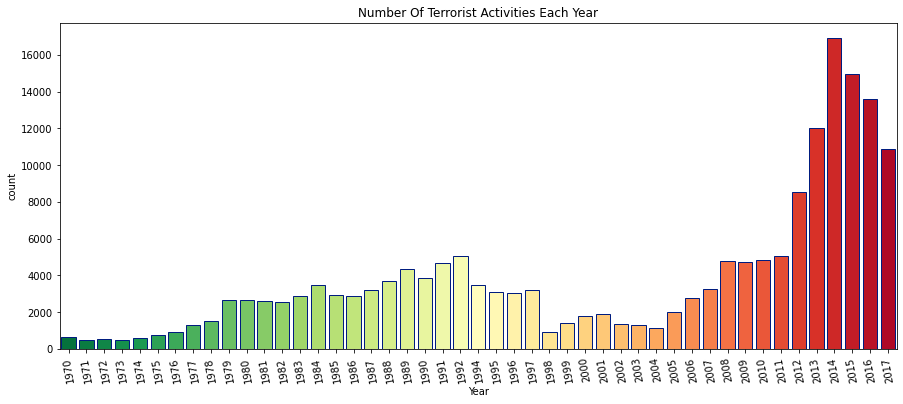

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=dataSet,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',1),dodge=False,saturation=1.75)
plt.xticks(rotation=100)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


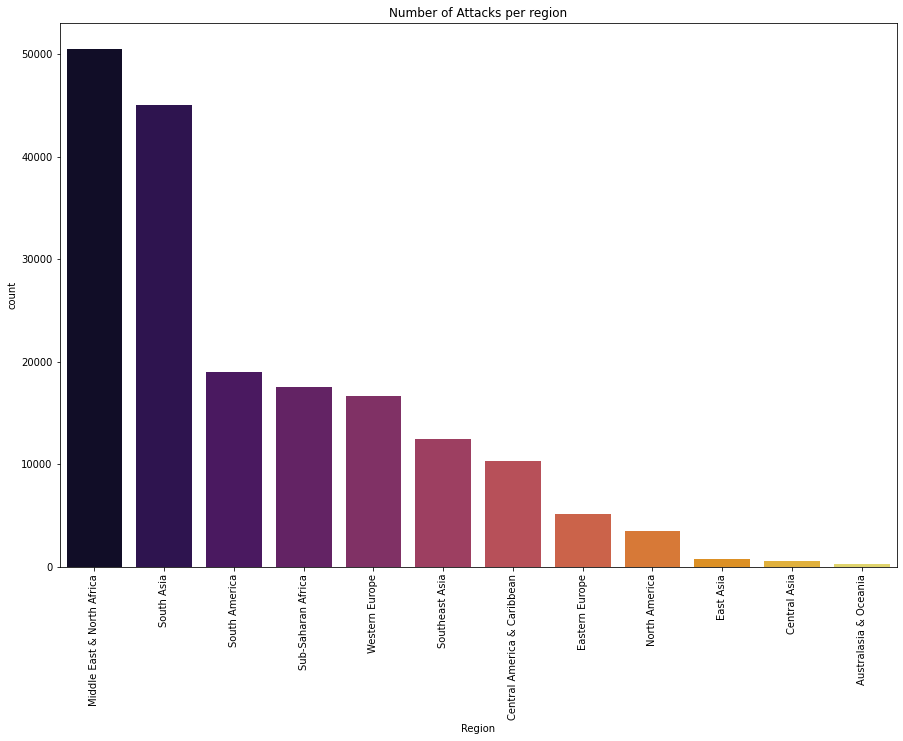

In [ ]:
plt.subplots(figsize=(15,10))
sns.countplot('Region',data=dataSet,palette='inferno',order=dataSet['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Attacks per region')
plt.show()

In [ ]:
terror_group=filename['gname'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


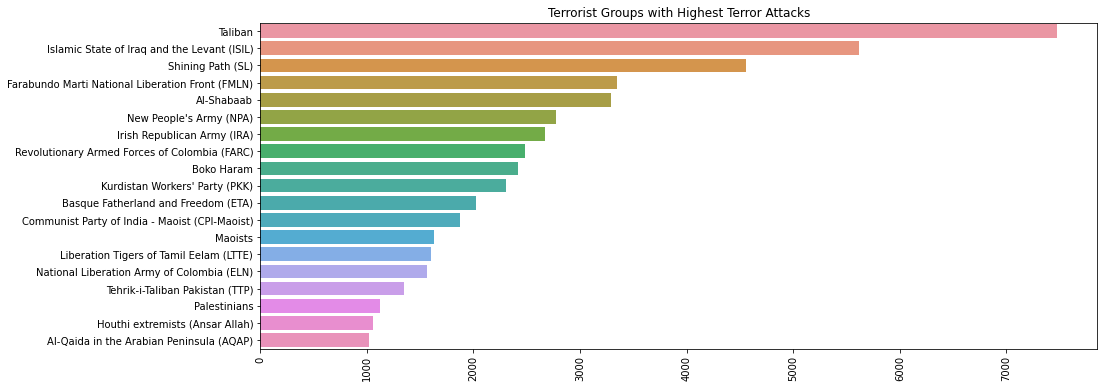

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(terror_group[1:20].values, terror_group[1:20].index)
plt.xticks(rotation=90)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

In [ ]:
data = newdf.drop("eventid",axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   iyear        181691 non-null  int64  
 1   iday         181691 non-null  int64  
 2   success      181691 non-null  int64  
 3   attacktype1  181691 non-null  int64  
 4   targtype1    181691 non-null  int64  
 5   natlty1      180132 non-null  float64
 6   weaptype1    181691 non-null  int64  
 7   nkill        171378 non-null  float64
 8   extended     181691 non-null  int64  
 9   country      181691 non-null  int64  
 10  region       181691 non-null  int64  
 11  latitude     177135 non-null  float64
 12  longitude    177134 non-null  float64
 13  specificity  181685 non-null  float64
 14  vicinity     181691 non-null  int64  
 15  crit1        181691 non-null  int64  
 16  suicide      181691 non-null  int64  
 17  nperps       110576 non-null  float64
dtypes: float64(6), int64(12)

In [ ]:
# data =newdf.dropna()
# Handling missing value using mice

from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

lr = LinearRegression()
imp = IterativeImputer(estimator=lr, verbose=2, max_iter=30, tol=1e-10, imputation_order='roman')
temp = imp.fit_transform(data)

data[['iyear', 'iday', 'success' ,'attacktype1', 'targtype1',  'natlty1',
                'weaptype1', 'nkill',  'extended', 'country', 'region', 'latitude',
                'longitude', 'specificity', 'vicinity','crit1','suicide','nperps']] = pd.DataFrame(temp)
data

[IterativeImputer] Completing matrix with shape (181691, 18)
[IterativeImputer] Ending imputation round 1/30, elapsed time 3.52
[IterativeImputer] Change: 1683883.5653234986, scaled tolerance: 0.0086185896 
[IterativeImputer] Ending imputation round 2/30, elapsed time 6.22
[IterativeImputer] Change: 161077.65346904518, scaled tolerance: 0.0086185896 
[IterativeImputer] Ending imputation round 3/30, elapsed time 9.33
[IterativeImputer] Change: 106173.2439872059, scaled tolerance: 0.0086185896 
[IterativeImputer] Ending imputation round 4/30, elapsed time 12.79
[IterativeImputer] Change: 117875.44398229104, scaled tolerance: 0.0086185896 
[IterativeImputer] Ending imputation round 5/30, elapsed time 16.48
[IterativeImputer] Change: 131803.05015209527, scaled tolerance: 0.0086185896 
[IterativeImputer] Ending imputation round 6/30, elapsed time 21.60
[IterativeImputer] Change: 148271.83701512404, scaled tolerance: 0.0086185896 
[IterativeImputer] Ending imputation round 7/30, elapsed time

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


,iyear,iday,success,attacktype1,targtype1,natlty1,weaptype1,nkill,extended,country,region,latitude,longitude,specificity,vicinity,crit1,suicide,nperps
0,1970.0,2.0,1.0,1.0,14.0,58.0,13.0,1.000000,0.0,58.0,2.0,18.456792,-69.951164,1.0,0.0,1.0,0.0,64.796382
1,1970.0,0.0,1.0,6.0,7.0,21.0,13.0,0.000000,0.0,130.0,1.0,19.371887,-99.086624,1.0,0.0,1.0,0.0,7.000000
2,1970.0,0.0,1.0,1.0,10.0,217.0,13.0,1.000000,0.0,160.0,5.0,15.478598,120.599741,4.0,0.0,1.0,0.0,105.831894
3,1970.0,0.0,1.0,3.0,7.0,217.0,6.0,2.449443,0.0,78.0,8.0,37.997490,23.762728,1.0,0.0,1.0,0.0,68.471628
4,1970.0,0.0,1.0,7.0,7.0,217.0,8.0,1.699703,0.0,101.0,4.0,33.580412,130.396361,1.0,0.0,1.0,0.0,127.123431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017.0,31.0,1.0,2.0,4.0,182.0,5.0,1.000000,0.0,182.0,11.0,2.359673,45.385034,2.0,0.0,1.0,0.0,-99.000000
181687,2017.0,31.0,1.0,3.0,4.0,167.0,6.0,2.000000,0.0,200.0,10.0,35.407278,35.942679,1.0,1.0,1.0,0.0,-99.000000
181688,2017.0,31.0,1.0,7.0,14.0,160.0,8.0,0.000000,0.0,160.0,5.0,6.900742,124.437908,2.0,0.0,1.0,0.0,-99.000000
181689,2017.0,31.0,0.0,3.0,2.0,92.0,6.0,0.000000,0.0,92.0,6.0,24.798346,93.940430,1.0,0.0,1.0,0.0,-99.000000


In [ ]:
data 

,iyear,iday,success,attacktype1,targtype1,natlty1,weaptype1,nkill,extended,country,region,latitude,longitude,specificity,vicinity,crit1,suicide,nperps
0,1970.0,2.0,1.0,1.0,14.0,58.0,13.0,1.000000,0.0,58.0,2.0,18.456792,-69.951164,1.0,0.0,1.0,0.0,64.796382
1,1970.0,0.0,1.0,6.0,7.0,21.0,13.0,0.000000,0.0,130.0,1.0,19.371887,-99.086624,1.0,0.0,1.0,0.0,7.000000
2,1970.0,0.0,1.0,1.0,10.0,217.0,13.0,1.000000,0.0,160.0,5.0,15.478598,120.599741,4.0,0.0,1.0,0.0,105.831894
3,1970.0,0.0,1.0,3.0,7.0,217.0,6.0,2.449443,0.0,78.0,8.0,37.997490,23.762728,1.0,0.0,1.0,0.0,68.471628
4,1970.0,0.0,1.0,7.0,7.0,217.0,8.0,1.699703,0.0,101.0,4.0,33.580412,130.396361,1.0,0.0,1.0,0.0,127.123431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017.0,31.0,1.0,2.0,4.0,182.0,5.0,1.000000,0.0,182.0,11.0,2.359673,45.385034,2.0,0.0,1.0,0.0,-99.000000
181687,2017.0,31.0,1.0,3.0,4.0,167.0,6.0,2.000000,0.0,200.0,10.0,35.407278,35.942679,1.0,1.0,1.0,0.0,-99.000000
181688,2017.0,31.0,1.0,7.0,14.0,160.0,8.0,0.000000,0.0,160.0,5.0,6.900742,124.437908,2.0,0.0,1.0,0.0,-99.000000
181689,2017.0,31.0,0.0,3.0,2.0,92.0,6.0,0.000000,0.0,92.0,6.0,24.798346,93.940430,1.0,0.0,1.0,0.0,-99.000000


# Target Selection

In [ ]:
def categorise(row):  
    if row['success'] == 0 and row['suicide'] == 0:
        return 0
    elif row['success'] == 1 and row['suicide'] == 0:
        return 2
    elif row['success'] == 1 and row['suicide'] == 1:
        return 1
    elif row['success'] == 0 and row['suicide'] == 1:
        return 3

In [ ]:
data['Target'] = data.apply(lambda row: categorise(row), axis=1)
data.head()

,iyear,iday,success,attacktype1,targtype1,natlty1,weaptype1,nkill,extended,country,region,latitude,longitude,specificity,vicinity,crit1,suicide,nperps,Target
0,1970.0,2.0,1.0,1.0,14.0,58.0,13.0,1.000000,0.0,58.0,2.0,18.456792,-69.951164,1.0,0.0,1.0,0.0,64.796382,2
1,1970.0,0.0,1.0,6.0,7.0,21.0,13.0,0.000000,0.0,130.0,1.0,19.371887,-99.086624,1.0,0.0,1.0,0.0,7.000000,2
2,1970.0,0.0,1.0,1.0,10.0,217.0,13.0,1.000000,0.0,160.0,5.0,15.478598,120.599741,4.0,0.0,1.0,0.0,105.831894,2
3,1970.0,0.0,1.0,3.0,7.0,217.0,6.0,2.449443,0.0,78.0,8.0,37.997490,23.762728,1.0,0.0,1.0,0.0,68.471628,2
4,1970.0,0.0,1.0,7.0,7.0,217.0,8.0,1.699703,0.0,101.0,4.0,33.580412,130.396361,1.0,0.0,1.0,0.0,127.123431,2


# Initial Feature and Target Selection

In [ ]:
s_drop = data[['success','suicide']]  
final_data = data.drop(s_drop,axis=1)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   iyear        181691 non-null  float64
 1   iday         181691 non-null  float64
 2   attacktype1  181691 non-null  float64
 3   targtype1    181691 non-null  float64
 4   natlty1      181691 non-null  float64
 5   weaptype1    181691 non-null  float64
 6   nkill        181691 non-null  float64
 7   extended     181691 non-null  float64
 8   country      181691 non-null  float64
 9   region       181691 non-null  float64
 10  latitude     181691 non-null  float64
 11  longitude    181691 non-null  float64
 12  specificity  181691 non-null  float64
 13  vicinity     181691 non-null  float64
 14  crit1        181691 non-null  float64
 15  nperps       181691 non-null  float64
 16  Target       181691 non-null  int64  
dtypes: float64(16), int64(1)
memory usage: 23.6 MB


In [ ]:
X = final_data.drop(['Target'], axis=1, inplace=False)  
X 

,iyear,iday,attacktype1,targtype1,natlty1,weaptype1,nkill,extended,country,region,latitude,longitude,specificity,vicinity,crit1,nperps
0,1970.0,2.0,1.0,14.0,58.0,13.0,1.000000,0.0,58.0,2.0,18.456792,-69.951164,1.0,0.0,1.0,64.796382
1,1970.0,0.0,6.0,7.0,21.0,13.0,0.000000,0.0,130.0,1.0,19.371887,-99.086624,1.0,0.0,1.0,7.000000
2,1970.0,0.0,1.0,10.0,217.0,13.0,1.000000,0.0,160.0,5.0,15.478598,120.599741,4.0,0.0,1.0,105.831894
3,1970.0,0.0,3.0,7.0,217.0,6.0,2.449443,0.0,78.0,8.0,37.997490,23.762728,1.0,0.0,1.0,68.471628
4,1970.0,0.0,7.0,7.0,217.0,8.0,1.699703,0.0,101.0,4.0,33.580412,130.396361,1.0,0.0,1.0,127.123431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017.0,31.0,2.0,4.0,182.0,5.0,1.000000,0.0,182.0,11.0,2.359673,45.385034,2.0,0.0,1.0,-99.000000
181687,2017.0,31.0,3.0,4.0,167.0,6.0,2.000000,0.0,200.0,10.0,35.407278,35.942679,1.0,1.0,1.0,-99.000000
181688,2017.0,31.0,7.0,14.0,160.0,8.0,0.000000,0.0,160.0,5.0,6.900742,124.437908,2.0,0.0,1.0,-99.000000
181689,2017.0,31.0,3.0,2.0,92.0,6.0,0.000000,0.0,92.0,6.0,24.798346,93.940430,1.0,0.0,1.0,-99.000000


In [ ]:
Y=final_data['Target']
Y

0         2
1         2
2         2
3         2
4         2
         ..
181686    2
181687    2
181688    2
181689    0
181690    0
Name: Target, Length: 181691, dtype: int64

In [ ]:
f_data = pd.concat([X, Y],axis=1)
f_data

,iyear,iday,attacktype1,targtype1,natlty1,weaptype1,nkill,extended,country,region,latitude,longitude,specificity,vicinity,crit1,nperps,Target
0,1970.0,2.0,1.0,14.0,58.0,13.0,1.000000,0.0,58.0,2.0,18.456792,-69.951164,1.0,0.0,1.0,64.796382,2
1,1970.0,0.0,6.0,7.0,21.0,13.0,0.000000,0.0,130.0,1.0,19.371887,-99.086624,1.0,0.0,1.0,7.000000,2
2,1970.0,0.0,1.0,10.0,217.0,13.0,1.000000,0.0,160.0,5.0,15.478598,120.599741,4.0,0.0,1.0,105.831894,2
3,1970.0,0.0,3.0,7.0,217.0,6.0,2.449443,0.0,78.0,8.0,37.997490,23.762728,1.0,0.0,1.0,68.471628,2
4,1970.0,0.0,7.0,7.0,217.0,8.0,1.699703,0.0,101.0,4.0,33.580412,130.396361,1.0,0.0,1.0,127.123431,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017.0,31.0,2.0,4.0,182.0,5.0,1.000000,0.0,182.0,11.0,2.359673,45.385034,2.0,0.0,1.0,-99.000000,2
181687,2017.0,31.0,3.0,4.0,167.0,6.0,2.000000,0.0,200.0,10.0,35.407278,35.942679,1.0,1.0,1.0,-99.000000,2
181688,2017.0,31.0,7.0,14.0,160.0,8.0,0.000000,0.0,160.0,5.0,6.900742,124.437908,2.0,0.0,1.0,-99.000000,2
181689,2017.0,31.0,3.0,2.0,92.0,6.0,0.000000,0.0,92.0,6.0,24.798346,93.940430,1.0,0.0,1.0,-99.000000,0


# Features Engineering

In [ ]:
X.corr()

,iyear,iday,attacktype1,targtype1,natlty1,weaptype1,nkill,extended,country,region,latitude,longitude,specificity,vicinity,crit1,nperps
iyear,1.000000,0.018254,0.074153,0.079082,-0.021956,-0.011737,0.017330,0.091754,-0.135023,0.401384,0.172323,0.003901,0.030627,0.070659,0.001995,0.003051
iday,0.018254,1.000000,-0.005333,-0.000052,0.003864,-0.003019,-0.003747,-0.004700,0.003468,0.009710,0.003877,-0.002301,-0.006988,-0.005367,0.011434,-0.002354
attacktype1,0.074153,-0.005333,1.000000,0.014513,0.014047,0.658954,0.004608,0.272272,-0.021384,0.007642,0.010854,0.001577,0.056043,0.006504,0.027544,0.001592
targtype1,0.079082,-0.000052,0.014513,1.000000,-0.040596,0.019846,0.009433,0.011613,-0.019703,0.041396,-0.024425,-0.003463,0.044520,0.024644,-0.040026,-0.003491
natlty1,-0.021956,0.003864,0.014047,-0.040596,1.000000,-0.008168,0.003170,0.014218,0.602293,0.150973,-0.006177,-0.000430,-0.038378,0.013613,-0.009766,-0.000474
weaptype1,-0.011737,-0.003019,0.658954,0.019846,-0.008168,1.000000,0.006198,0.207802,-0.023708,0.013257,-0.012175,0.001612,0.064590,0.001496,0.029257,0.001656
nkill,0.017330,-0.003747,0.004608,0.009433,0.003170,0.006198,1.000000,0.032525,-0.014239,0.043439,-0.019914,-0.000566,0.023827,0.014133,0.010974,-0.000497
extended,0.091754,-0.004700,0.272272,0.011613,0.014218,0.207802,0.032525,1.000000,-0.020466,0.038389,-0.024471,0.000545,0.057900,0.017784,-0.015029,0.000465
country,-0.135023,0.003468,-0.021384,-0.019703,0.602293,-0.023708,-0.014239,-0.020466,1.000000,0.148597,0.180317,-0.000251,-0.084599,-0.012291,-0.006646,-0.000226
region,0.401384,0.009710,0.007642,0.041396,0.150973,0.013257,0.043439,0.038389,0.148597,1.000000,0.314802,0.004391,-0.084195,0.073678,0.025521,0.003928


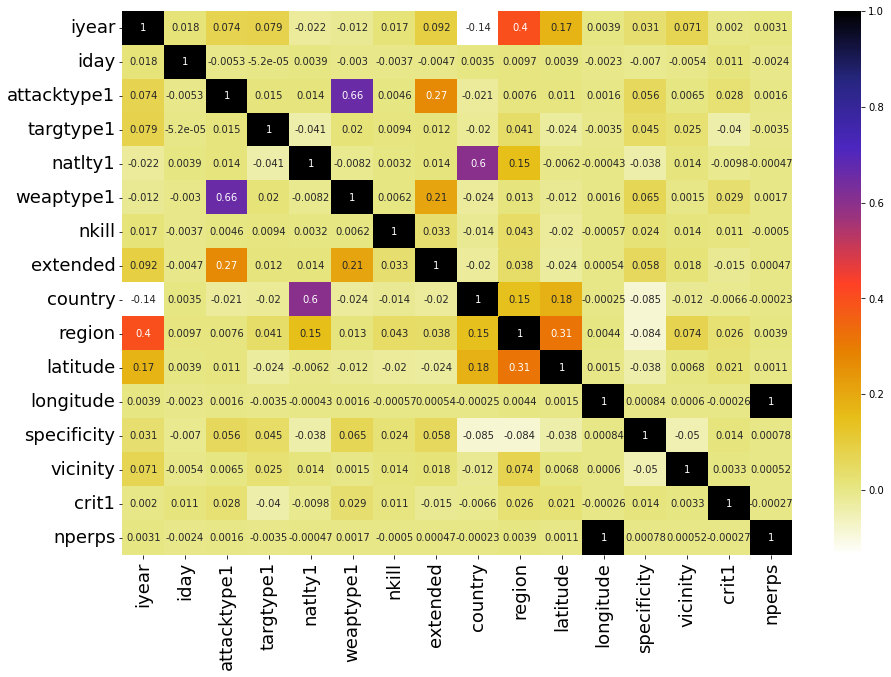

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(15,10))
cor = X.corr()
sns.heatmap(cor, annot=True, annot_kws={"size": 10},cmap=plt.cm.CMRmap_r)
plt.xticks(fontsize = 18)
plt.xticks(rotation = 90)
 
plt.yticks(fontsize=18)
plt.yticks(rotation = 0)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X, 0.7)
len(set(corr_features))

1

In [ ]:
corr_features

{'nperps'}

In [ ]:
X = X.drop(corr_features,axis=1)

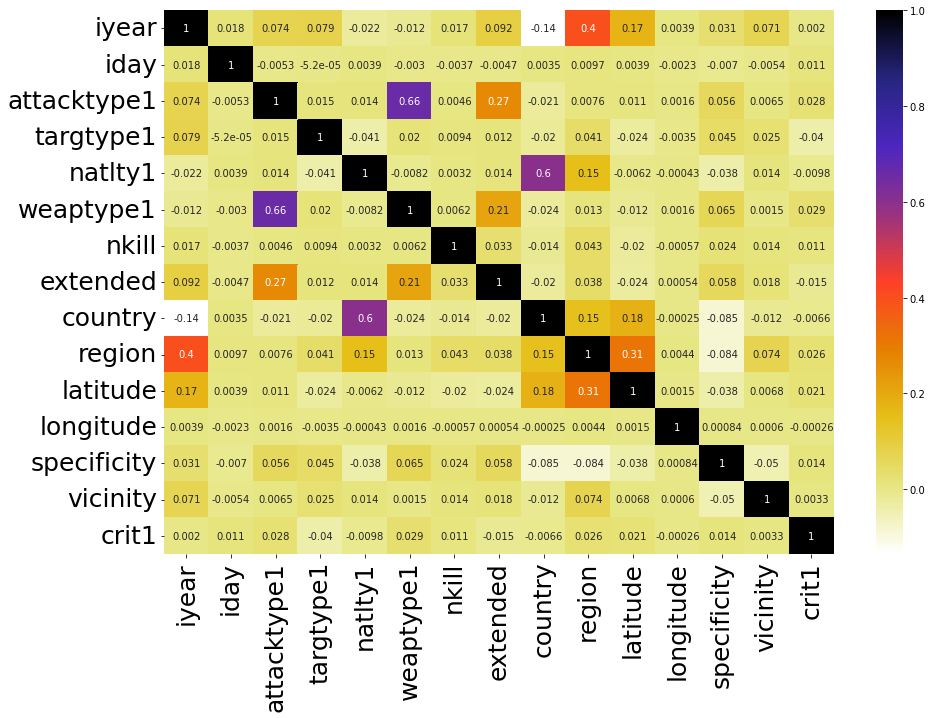

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(15,10))
cor = X.corr()
plt.xticks(fontsize = 25)
plt.xticks(rotation = 90)
 
plt.yticks(fontsize=25)
plt.yticks(rotation = 0)
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
### Apply Feature Selection
#1 first, I specify the Lasso Regression model, and I
#1 select a suitable alpha (equivalent of penalty).
#1 The bigger the alpha the less features that will be selected.

#1 Then I use the selectFromModel object from sklearn, which
#1 will select the features which coefficients are non-zero

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

feature_sel_model = SelectFromModel(Lasso(alpha=0.05, random_state=0)) 
feature_sel_model.fit(X, Y)

SelectFromModel(estimator=Lasso(alpha=0.05, random_state=0))

In [ ]:
feature_sel_model.get_support()
feature_sel_model

SelectFromModel(estimator=Lasso(alpha=0.05, random_state=0))

In [ ]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

#let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print(selected_feat)

total features: 15
selected features: 7
Index(['iyear', 'attacktype1', 'targtype1', 'natlty1', 'nkill', 'country',
       'latitude'],
      dtype='object')


In [ ]:
x = X[selected_feat]

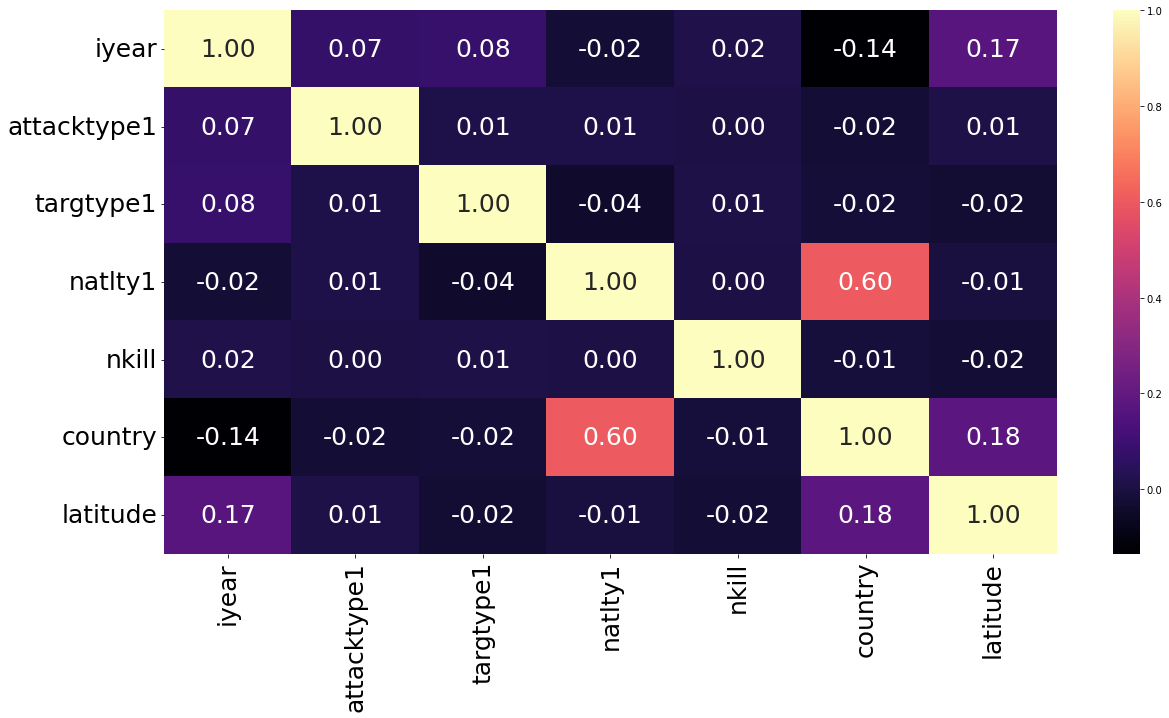

In [ ]:
plt.figure(figsize=(20,10))
final_matrix = x.corr()
sns.heatmap(final_matrix,fmt='.2f', annot_kws={"size": 25}, annot=True, cmap='magma')
plt.xticks(fontsize = 25)
plt.xticks(rotation = 90)
 
plt.yticks(fontsize=25)
plt.yticks(rotation = 0)

plt.show()

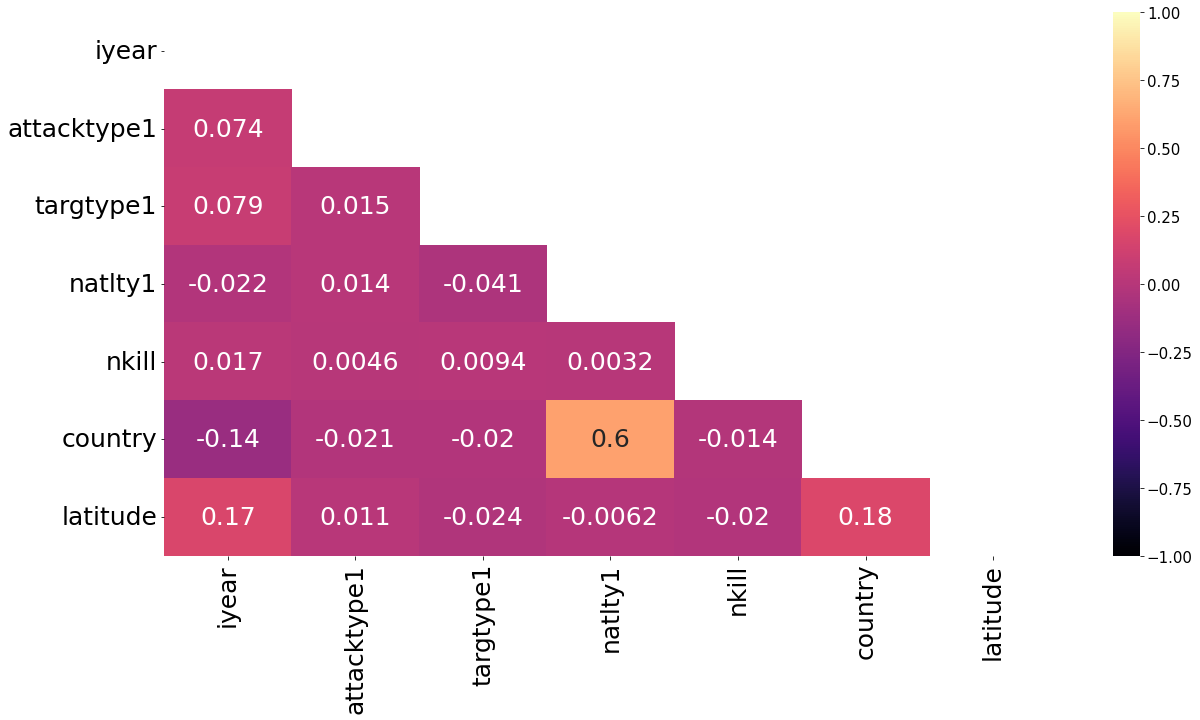

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# set figure size
plt.figure(figsize=(20,10))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(x.corr(), dtype=bool))

# generate heatmap

font = {'size': 15}

plt.rc('font', **font)
sns.heatmap(x.corr(), mask=mask,annot_kws={"size": 25}, vmin=-1, vmax=1, annot=True, cmap='magma')
 
plt.xticks(fontsize = 25)
plt.xticks(rotation = 90)
 
plt.yticks(fontsize=25)
plt.yticks(rotation = 0)
plt.show()

# Balance

In [ ]:
x

,iyear,attacktype1,targtype1,natlty1,nkill,country,latitude
0,1970.0,1.0,14.0,58.0,1.000000,58.0,18.456792
1,1970.0,6.0,7.0,21.0,0.000000,130.0,19.371887
2,1970.0,1.0,10.0,217.0,1.000000,160.0,15.478598
3,1970.0,3.0,7.0,217.0,2.449443,78.0,37.997490
4,1970.0,7.0,7.0,217.0,1.699703,101.0,33.580412
...,...,...,...,...,...,...,...
181686,2017.0,2.0,4.0,182.0,1.000000,182.0,2.359673
181687,2017.0,3.0,4.0,167.0,2.000000,200.0,35.407278
181688,2017.0,7.0,14.0,160.0,0.000000,160.0,6.900742
181689,2017.0,3.0,2.0,92.0,0.000000,92.0,24.798346


In [ ]:
Y.value_counts()

2    156064
0     18994
1      5568
3      1065
Name: Target, dtype: int64

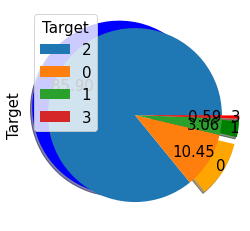

In [ ]:
# fig1, ax1 = plt.subplots()
# ax = Y.value_counts().plot.pie(autopct='%.2f') 

mycolors = ["b", "orange", "g", "r"]
myexplode = [0.2, 0.2, 0.2, 0.2]

plt.pie(Y.value_counts(),colors = mycolors,autopct = '%.2f', explode = myexplode, shadow = True)
ax = Y.value_counts().plot.pie() 
plt.legend(title = "Target")
plt.show()

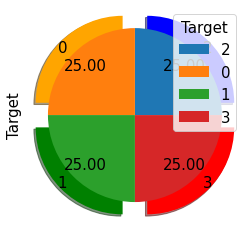

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(sampling_strategy="not majority")
# X = np.array(X)
# x, y = ros.fit_resample(X,Y)

# ax = y.value_counts().plot.pie(autopct='%.2f')
# _ = ax.set_title("Over sampling")

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority")
x, y = ros.fit_resample(x,Y)

mycolors = ["b", "orange", "g", "r"]
myexplode = [0.2, 0.2, 0.2, 0.2]
_ = ax.set_title("Over sampling")
plt.pie(y.value_counts(),colors = mycolors,autopct = '%.2f', explode = myexplode, shadow = True)
ax = y.value_counts().plot.pie() 
plt.legend(title = "Target")
plt.show()

In [ ]:
y.value_counts()

2    156064
0    156064
1    156064
3    156064
Name: Target, dtype: int64

In [ ]:
x

,iyear,attacktype1,targtype1,natlty1,nkill,country,latitude
0,1970.0,1.0,14.0,58.0,1.000000,58.0,18.456792
1,1970.0,6.0,7.0,21.0,0.000000,130.0,19.371887
2,1970.0,1.0,10.0,217.0,1.000000,160.0,15.478598
3,1970.0,3.0,7.0,217.0,2.449443,78.0,37.997490
4,1970.0,7.0,7.0,217.0,1.699703,101.0,33.580412
...,...,...,...,...,...,...,...
624251,2017.0,3.0,4.0,95.0,3.000000,95.0,34.567274
624252,2010.0,1.0,2.0,153.0,7.000000,153.0,34.006004
624253,2015.0,3.0,4.0,95.0,4.000000,95.0,36.229574
624254,2015.0,3.0,4.0,200.0,8.310944,200.0,36.503593


In [ ]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   iyear        181691 non-null  float64
 1   iday         181691 non-null  float64
 2   attacktype1  181691 non-null  float64
 3   targtype1    181691 non-null  float64
 4   natlty1      181691 non-null  float64
 5   weaptype1    181691 non-null  float64
 6   nkill        181691 non-null  float64
 7   extended     181691 non-null  float64
 8   country      181691 non-null  float64
 9   region       181691 non-null  float64
 10  latitude     181691 non-null  float64
 11  longitude    181691 non-null  float64
 12  specificity  181691 non-null  float64
 13  vicinity     181691 non-null  float64
 14  crit1        181691 non-null  float64
 15  nperps       181691 non-null  float64
 16  Target       181691 non-null  int64  
dtypes: float64(16), int64(1)
memory usage: 23.6 MB


In [ ]:
x_features = f_data[['attacktype1','targtype1','natlty1','weaptype1','nkill','extended','country',
                        'region','latitude','specificity', 'vicinity']]

In [ ]:
# fig = plt.figure(figsize = (20, 25))
# j = 0
# for i in x_features:
#     plt.subplot(6, 4, j+1)
#     j += 1
#     sns.distplot(x_features[i][final_data['Target']==0], color='g', label = 'None')
#     sns.distplot(x_features[i][final_data['Target']==1], color='r', label = 'Both')
#     sns.distplot(x_features[i][final_data['Target']==2], color='b', label = 'Only Success')
#     sns.distplot(x_features[i][final_data['Target']==3], color='black', label = 'Only Suicide')
#     plt.legend(loc='best')
# fig.suptitle('Success and Suicide Attack Analysis')
# fig.tight_layout()
# fig.subplots_adjust(top=0.95)
# plt.show()

In [ ]:
!pip install mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 5.2 MB/s 


In [ ]:
# from mplsoccer import PyPizza
# import matplotlib.pyplot as plt


# params = ["Success","None","Both","Suicide",  
#           "Success","None","Both","Suicide" 
#           ]

# # value list
# # The values are taken from the excellent fbref website (supplied by StatsBomb)
# values = [85.9 , 10.45, 3.06, 0.59,
#          25 ,25, 25, 25]

# # minimum range value and maximum range value for parameters
# min_range = [0, 0, 0, 0,0,0,0,0]
# max_range = [92, 50, 50, 50,26, 30, 30, 27]

# # color for the slices and text
# slice_colors = ["#bf73fa"] * 4 + ["#0096FF"] * 4  
# text_colors = ["#000000"] * 8 
# # instantiate PyPizza class
# baker = PyPizza(
#     params=params,                  # list of parameters
#     min_range=min_range,        # min range values
#     max_range=max_range,        # max range values
#     background_color="#FFFFFF",     # background color
#     straight_line_color="#000000",  # color for straight lines
#     straight_line_lw=1,             # linewidth for straight lines
#     last_circle_color="#000000",    # color for last line
#     last_circle_lw=1,               # linewidth of last circle
#     other_circle_lw=0,              # linewidth for other circles
#     inner_circle_size=0          # size of inner circle
# )

# # plot pizza
# fig, ax = baker.make_pizza(
#     values,                          # list of values
#     figsize=(8, 8.5),                # adjust the figsize according to your need
#     color_blank_space="same",        # use the same color to fill blank space
#     slice_colors=slice_colors,       # color for individual slices
#     value_colors=text_colors,        # color for the value-text
#     value_bck_colors=slice_colors,   # color for the blank spaces
#     blank_alpha=0.4,                 # alpha for blank-space colors
#     kwargs_slices=dict(
#         edgecolor="#000000", zorder=2, linewidth=1
#     ),                               # values to be used when plotting slices

#     kwargs_params=dict(
#         color="#000000", fontsize=16, zorder=5,  
#          va="center"
#     ),                             # values to be used when adding parameter labels
#     kwargs_values=dict(
#         color="#000000", fontsize=12,
#         zorder=5,
#         bbox=dict(
#             edgecolor="#000000", facecolor="cornflowerblue",
#             boxstyle="round,pad=0.2", lw=1
#         )
#     )                                # values to be used when adding parameter-values labels
# )

# # add title
# fig.text(
#     0.515, 0.960, "Balance and imbalance comparision", size=16,
#     ha="center", color="#000000"
# )

# # add credits
# CREDIT_1 = ""
# CREDIT_2 = ""

# fig.text(
#     0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
#      color="#F2F2F2",
#     ha="right"
# )

# # add text
# fig.text(
#     0.05, 1.0, "Before Balancing        After Balancing", size=16,
#      color="#000000"
# )

# # add rectangles
# fig.patches.extend([
#     plt.Rectangle(
#         (0.01, 1), 0.025, 0.021, fill=True, color="#bf73fa",
#         transform=fig.transFigure, figure=fig
#     ),
#     plt.Rectangle(
#         (0.32, 1), 0.025, 0.021, fill=True, color="#0096FF",
#         transform=fig.transFigure, figure=fig
#     )
# ])

# plt.show()

# Different Machine Learning Algorithms

In [ ]:
result = pd.concat([x, y], axis=1)

result

,iyear,attacktype1,targtype1,natlty1,nkill,country,latitude,Target
0,1970.0,1.0,14.0,58.0,1.000000,58.0,18.456792,2
1,1970.0,6.0,7.0,21.0,0.000000,130.0,19.371887,2
2,1970.0,1.0,10.0,217.0,1.000000,160.0,15.478598,2
3,1970.0,3.0,7.0,217.0,2.449443,78.0,37.997490,2
4,1970.0,7.0,7.0,217.0,1.699703,101.0,33.580412,2
...,...,...,...,...,...,...,...,...
624251,2017.0,3.0,4.0,95.0,3.000000,95.0,34.567274,3
624252,2010.0,1.0,2.0,153.0,7.000000,153.0,34.006004,3
624253,2015.0,3.0,4.0,95.0,4.000000,95.0,36.229574,3
624254,2015.0,3.0,4.0,200.0,8.310944,200.0,36.503593,3


In [ ]:
result  = result.sample(frac=0.3)
result

,iyear,attacktype1,targtype1,natlty1,nkill,country,latitude,Target
422459,2007.0,3.0,14.0,95.0,31.0,95.0,33.303566,1
242629,2010.0,3.0,6.0,217.0,0.0,603.0,52.829397,0
136809,2014.0,3.0,3.0,95.0,0.0,95.0,35.452110,2
446838,2013.0,3.0,4.0,422.0,2.0,4.0,34.960411,1
259363,2016.0,9.0,4.0,4.0,30.0,4.0,32.082291,0
...,...,...,...,...,...,...,...,...
235026,2010.0,3.0,19.0,98.0,0.0,98.0,41.890961,0
375881,2008.0,3.0,14.0,4.0,1.0,4.0,34.516895,1
455825,2014.0,3.0,3.0,4.0,5.0,4.0,32.675960,1
508628,2016.0,3.0,4.0,95.0,25.0,95.0,36.434563,3


In [ ]:
x = result.drop(['Target'], axis=1, inplace=False)  
y = result['Target']


# Random Forest

In [ ]:
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split( x, y, test_size = 0.3, random_state = 42)

In [ ]:
# Instantiate model with 1000 decision trees
clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
# Train the model on training data
clf.fit(X_train_RF, y_train_RF);

In [ ]:
# use the model to make predictions with the test data
y_pred_RF = clf.predict(X_test_RF)

In [ ]:
# combining 2 numpy arrays into one pandas dataframe
final_model_predictions_RF = pd.DataFrame({'Actual':y_test_RF, 'predictions':y_pred_RF})

In [ ]:
final_model_predictions_RF.head()

,Actual,predictions
452550,1,1
431942,1,1
193981,0,0
524246,3,3
347755,1,3


In [ ]:
# how did our model perform?
count_misclassified = (y_test_RF != y_pred_RF).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_RF = metrics.accuracy_score(y_test_RF, y_pred_RF)
print('Accuracy: {:.4f}'.format(accuracy_RF))

Misclassified samples: 3649
Accuracy: 0.9351


In [ ]:
y_pred_prob = clf.predict_proba(X_test_RF)  # 2  columns for probability it is creating

In [ ]:
y_pred_prob = clf.predict_proba(X_test_RF)[:,1]   # The first index refers to the probability that the data belong to class 0, and the second refers to the probabilit

In [ ]:
final_model_predictions_RF['Predicted_prob'] = y_pred_prob

In [ ]:
final_model_predictions_RF.head()

,Actual,predictions,Predicted_prob
452550,1,1,1.00000
431942,1,1,1.00000
193981,0,0,0.00000
524246,3,3,0.00000
347755,1,3,0.44036


In [ ]:
accuracy_RF= metrics.accuracy_score( final_model_predictions_RF.Actual, final_model_predictions_RF.predictions  )*100
accuracy_RF='{:.2f}'.format(accuracy_RF)
print( 'Total Accuracy : ',accuracy_RF )
recall_RF=metrics.recall_score(final_model_predictions_RF.Actual, final_model_predictions_RF.predictions,pos_label='positive',
                                           average='micro')
print('recall :',recall_RF)
precision_RF=metrics.precision_score(final_model_predictions_RF.Actual, final_model_predictions_RF.predictions,pos_label='positive',
                                           average='micro')
print('Precision :',precision_RF)

Total Accuracy :  93.51
recall : 0.9350526840381603
Precision : 0.9350526840381603


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [ ]:
F1_RF = 2 * (precision_RF * recall_RF) / (precision_RF + recall_RF)
F1_RF

0.9350526840381603

In [ ]:
y_test_RF.value_counts()

3    14181
1    14142
0    14022
2    13839
Name: Target, dtype: int64

In [ ]:
cm_RF = confusion_matrix(y_test_RF, y_pred_RF)
cm_RF

array([[13012,    24,   879,   107],
       [    6, 13950,    24,   162],
       [ 1699,   556, 11462,   122],
       [   45,     0,    25, 14111]])

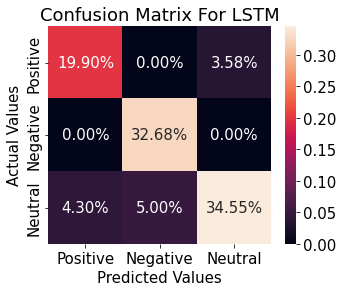

In [29]:
from sklearn.metrics import confusion_matrix
# Creating  a confusion matrix,which compares the y_test and y_pred
cm_RF =([[1111,  0,  200],
       [ 0, 1825,  0 ],
       [ 240,  279, 1929]])

 
cm_df = pd.DataFrame(cm_RF/np.sum(cm_RF),
                     index = ['Positive','Negative','Neutral'], 
                     columns = ['Positive','Negative','Neutral'])

font = {'size': 15}

plt.rc('font', **font)
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, fmt='.2%', annot=True)
plt.title('Confusion Matrix For LSTM')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
 
plt.show()

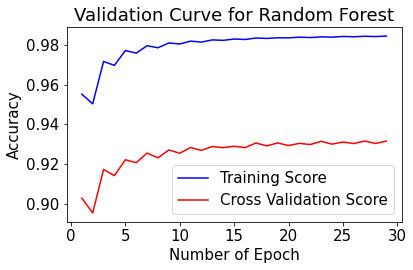

In [ ]:
# Import Required libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 30, 1)
train_score, test_score = validation_curve(RandomForestClassifier(), 
                                             x, 
                                             y, 
                                             param_name="n_estimators", 
                                             param_range=parameter_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'r')
font = {'size': 15}

plt.rc('font', **font)

 
# Creating the plot
plt.title("Validation Curve for Random Forest")
plt.xlabel("Number of Epoch")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_cnb_RF = clf.predict(X_test_RF)
y_prob_pred_cnb_RF = clf.predict_proba(X_test_RF)

#roc auc score
roc_auc_score(y_test_RF, y_prob_pred_cnb_RF, multi_class='ovo', average='weighted')

0.9904128390633863

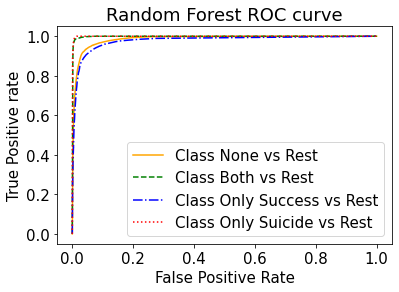

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_RF, y_prob_pred_cnb_RF[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='solid',color='orange', label='Class None vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='dashed',color='green', label='Class Both vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='dashdot',color='blue', label='Class Only Success vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='dotted',color='red', label='Class Only Suicide vs Rest')
plt.title('Random Forest ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Random Forest ROC Curve',dpi=300);    


# K Nearest Neighbor

In [ ]:
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_KNN)

X_train_knn = scaler.transform(X_train_KNN)
X_test_knn = scaler.transform(X_test_KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train_knn, y_train_KNN)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred_knn = classifier.predict(X_test_knn)

In [ ]:
final_model_predictions_knn = pd.DataFrame({'Actual':y_test_KNN, 'predictions':y_pred_knn})

In [ ]:
# how did our model perform?
count_misclassified = (y_test_KNN != y_pred_knn).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_KNN = metrics.accuracy_score(y_test_KNN, y_pred_knn)
print('Accuracy: {:.4f}'.format(accuracy_KNN))

Misclassified samples: 6113
Accuracy: 0.8912


In [ ]:
accuracy_knn=metrics.accuracy_score( final_model_predictions_knn.Actual, final_model_predictions_knn.predictions)*100
accuracy_knn='{:.2f}'.format(accuracy_knn)
print( 'Total Accuracy : ',accuracy_knn)
recall_knn=metrics.recall_score(final_model_predictions_knn.Actual, final_model_predictions_knn.predictions,average='micro' )
print('recall',recall_knn)
Precision_knn=metrics.precision_score(final_model_predictions_knn.Actual, final_model_predictions_knn.predictions,average='micro' )
print('Precision',Precision_knn)

Total Accuracy :  89.12
recall 0.8911967820019935
Precision 0.8911967820019935


In [ ]:
F1_KNN = 2 * (Precision_knn * recall_knn) / (Precision_knn + recall_knn)
F1_KNN

0.8911967820019935

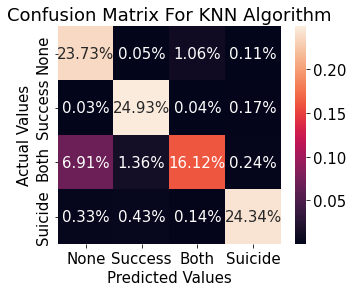

In [ ]:
from sklearn.metrics import confusion_matrix
# Creating  a confusion matrix,which compares the y_test and y_pred
cm_KNN = confusion_matrix(y_test_KNN, y_pred_knn)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_KNN = pd.DataFrame(cm_KNN/np.sum(cm_KNN),
                     index = ['None','Success','Both','Suicide'], 
                     columns = ['None','Success','Both','Suicide'])

font = {'size': 15}

plt.rc('font', **font)
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_KNN, fmt='.2%', annot=True)
plt.title('Confusion Matrix For KNN Algorithm')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

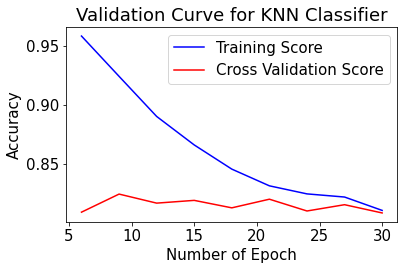

In [ ]:
# Import Required libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

x_KNN = pd.DataFrame(x)
y_KNN = pd.DataFrame(y)

X_KNN = x_KNN.head(3000)
Y_KNN = y_KNN.head(3000)
 
# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(2, 11, 1)
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(KNeighborsClassifier(), X_KNN, Y_KNN,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                        cv = 3, scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)+.15
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)+.23
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range*3, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range*3, mean_test_score,
   label = "Cross Validation Score", color = 'r')
 
# Creating the plot
plt.title("Validation Curve for KNN Classifier")
plt.xlabel("Number of Epoch")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
#y_pred_cnb_KNN = classifier.predict(X_test_KNN)
# y_pred_knn
y_prob_pred_cnb_KNN = classifier.predict_proba(X_test_knn)

#roc auc score
roc_auc_score(y_test_KNN, y_prob_pred_cnb_KNN, multi_class='ovo', average='weighted')

0.9561202416808326

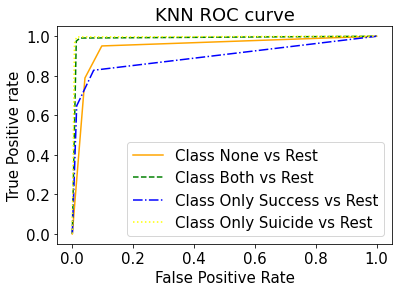

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_KNN, y_prob_pred_cnb_KNN[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='solid',color='orange', label='Class None vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='dashed',color='green', label='Class Both vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='dashdot',color='blue', label='Class Only Success vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='dotted',color='yellow', label='Class Only Suicide vs Rest')
plt.title('KNN ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('KNN ROC curve',dpi=300);    


# Decision Tree

In [ ]:
# import the regressor 
from sklearn.tree import DecisionTreeClassifier 


In [ ]:
# create a regressor object 
decision_Tree_Classifier = DecisionTreeClassifier (random_state = 0) 

In [ ]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split( x, y, test_size = 0.3, random_state = 100)

In [ ]:
decision_Tree_Classifier.fit(X_train_DT, y_train_DT) 

DecisionTreeClassifier(random_state=0)

In [ ]:
# predicting a new value 
  
# test the output by changing values, like 3750 
y_pred_DT = decision_Tree_Classifier.predict(X_test_DT) 

In [ ]:
final_model_predictions_DT = pd.DataFrame({'Actual':y_test_DT, 'predictions':y_pred_DT})
final_model_predictions_DT

,Actual,predictions
190955,0,0
32723,2,2
620955,3,3
409745,1,1
336714,1,1
...,...,...
124321,2,2
147148,2,2
200018,0,0
97146,1,1


In [ ]:
# how did our model perform?
count_misclassified = (y_test_DT != y_pred_DT).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_DT = metrics.accuracy_score(y_test_DT, y_pred_DT) *100
print( 'Total Accuracy : ',accuracy_DT)

Misclassified samples: 4122
Total Accuracy :  92.6633917129432


In [ ]:
accuracy_DT = metrics.accuracy_score( final_model_predictions_DT.Actual, final_model_predictions_DT.predictions  )*100
accuracy_DT='{:.2f}'.format(accuracy_DT)
print( 'Total Accuracy : ',accuracy_DT)
recall_DT=metrics.recall_score(final_model_predictions_DT.Actual, final_model_predictions_DT.predictions,average='micro' )
print('recall',recall_DT)
Precision_DT=metrics.precision_score(final_model_predictions_DT.Actual, final_model_predictions_DT.predictions,average='micro' )
print('Precision',Precision_DT)

Total Accuracy :  92.66
recall 0.9266339171294319
Precision 0.9266339171294319


In [ ]:
F1_DT = 2 * (Precision_DT * recall_DT) / (Precision_DT + recall_DT)
F1_DT

0.9266339171294319

In [ ]:
# define the tree depths to evaluate
values = [i for i in range(1, 30)]

In [ ]:
train_scores, test_scores = list(), list()

In [ ]:

# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train_DT, y_train_DT)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train_DT)
	train_acc = accuracy_score(y_train_DT, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test_DT)
	test_acc = accuracy_score(y_test_DT, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.468, test: 0.465
>2, train: 0.549, test: 0.546
>3, train: 0.588, test: 0.586
>4, train: 0.650, test: 0.649
>5, train: 0.666, test: 0.664
>6, train: 0.688, test: 0.687
>7, train: 0.696, test: 0.696
>8, train: 0.712, test: 0.711
>9, train: 0.741, test: 0.739
>10, train: 0.758, test: 0.752
>11, train: 0.780, test: 0.771
>12, train: 0.800, test: 0.788
>13, train: 0.819, test: 0.803
>14, train: 0.839, test: 0.820
>15, train: 0.861, test: 0.837
>16, train: 0.880, test: 0.853
>17, train: 0.899, test: 0.867
>18, train: 0.914, test: 0.878
>19, train: 0.928, test: 0.888
>20, train: 0.940, test: 0.897
>21, train: 0.951, test: 0.905
>22, train: 0.960, test: 0.910
>23, train: 0.966, test: 0.915
>24, train: 0.971, test: 0.919
>25, train: 0.975, test: 0.920
>26, train: 0.978, test: 0.924
>27, train: 0.981, test: 0.924
>28, train: 0.982, test: 0.925
>29, train: 0.983, test: 0.925


In [ ]:
from matplotlib import pyplot

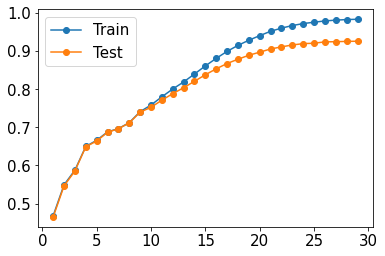

<Figure size 7200x7200 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

In [ ]:
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()
plt.figure(figsize=(100, 100))

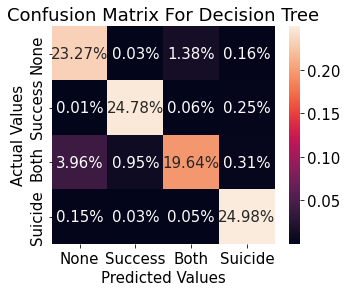

In [ ]:
from sklearn.metrics import confusion_matrix
# Creating  a confusion matrix,which compares the y_test and y_pred
cm_DT = confusion_matrix(y_test_DT, y_pred_DT)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_DT = pd.DataFrame(cm_DT/np.sum(cm_DT),
                     index = ['None','Success','Both','Suicide'], 
                     columns = ['None','Success','Both','Suicide'])
font = {'size': 15}

plt.rc('font', **font)
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_DT,fmt='.2%', annot=True)
plt.title('Confusion Matrix For Decision Tree')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

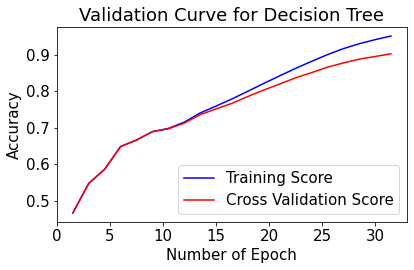

In [ ]:
# Import Required libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

 
# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 22, 1)
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(DecisionTreeClassifier(), x, y,
                                       param_name= 'max_depth' ,
                                       param_range = parameter_range,
                                      cv = 3, scoring = "accuracy",n_jobs=-1)
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range*1.5, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range*1.5, mean_test_score,
   label = "Cross Validation Score", color = 'r')
 
# Creating the plot
plt.title("Validation Curve for Decision Tree")
plt.xlabel("Number of Epoch")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_cnb_DT = decision_Tree_Classifier.predict(X_test_DT)
y_prob_pred_cnb_DT = decision_Tree_Classifier.predict_proba(X_test_DT)

#roc auc score
roc_auc_score(y_test_DT, y_prob_pred_cnb_DT, multi_class='ovo', average='weighted')

0.9591497373536648

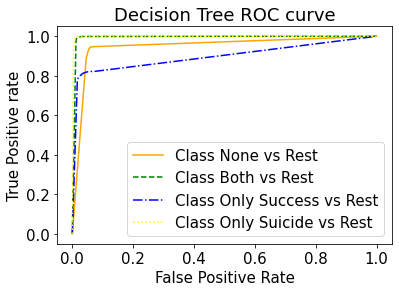

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_DT, y_prob_pred_cnb_DT[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='solid',color='orange', label='Class None vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='dashed',color='green', label='Class Both vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='dashdot',color='blue', label='Class Only Success vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='dotted',color='yellow', label='Class Only Suicide vs Rest')
plt.title('Decision Tree ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Decision Tree ROC',dpi=300);  

# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier()

In [ ]:
X_train_GB, X_test_GB, y_train_GB, y_test_GB = train_test_split( x, y, test_size = 0.3, random_state = 42)

In [ ]:
gb.fit(X_train_GB,y_train_GB)

GradientBoostingClassifier()

In [ ]:
y_pred_GB=gb.predict(X_test_GB)

In [ ]:
final_model_predictions_GB = pd.DataFrame({'Actual':y_test_GB, 'predictions':y_pred_GB})
final_model_predictions_GB

,Actual,predictions
469296,3,3
81530,2,2
228734,0,0
605071,3,3
240377,0,0
...,...,...
578496,3,3
350166,1,1
48020,2,2
262593,0,0


In [ ]:
count_misclassified = (y_test_GB != y_pred_GB).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_GB = metrics.accuracy_score(y_test_GB, y_pred_GB)
accuracy_GB='{:.3f}'.format(accuracy_GB)
accuracy_GB = float(accuracy_GB)*100
print("Accuracy :",accuracy_GB)

Misclassified samples: 13686
Accuracy : 75.6


In [ ]:
# prepare the cross-validation procedure
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std


cv_GB = KFold(n_splits=5, random_state=42, shuffle=True)
# evaluate model
scores_GB = cross_val_score(gb, x, y, scoring='accuracy', cv=cv_GB, n_jobs=-1)
# scores_RF = np.round((mean(scores_RF),2)*100
scores_GB = np.round(mean(scores_GB),3)*100   
# report performance
scores_GB
#print('Accuracy Using Cross Validation: %.3f ' % (mean(scores_RF)),'%')

75.5

In [ ]:
accuracy_GB =np.round( metrics.accuracy_score( final_model_predictions_GB.Actual, final_model_predictions_GB.predictions  ),2)*100
accuracy_GB='{:.2f}'.format(accuracy_GB)
print( 'Total Accuracy : ',accuracy_GB )
recall_GB =metrics.recall_score(final_model_predictions_GB.Actual, final_model_predictions_GB.predictions,pos_label='positive',
                                           average='micro')
print('recall :',recall_GB)
precision_GB =metrics.precision_score(final_model_predictions_GB.Actual, final_model_predictions_GB.predictions,pos_label='positive',
                                           average='micro')
print('Precision :',precision_GB)

Total Accuracy :  76.00
recall : 0.7564075181546348
Precision : 0.7564075181546348


In [ ]:
F1_GB = 2 * (precision_GB * recall_GB) / (precision_GB + recall_GB)
F1_GB

0.7564075181546348

In [ ]:
# define the tree depths to evaluate
valuesNB = [i for i in range(1, 10)]

In [ ]:
train_scoresNB, test_scoresNB = list(), list()

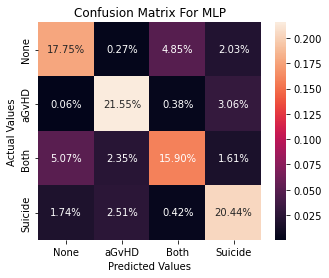

In [ ]:
from sklearn.metrics import confusion_matrix
# Creating  a confusion matrix,which compares the y_test and y_pred
cm_GB = confusion_matrix(y_test_GB, y_pred_GB)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_GB = pd.DataFrame(cm_GB/np.sum(cm_GB),
                     index = ['None','aGvHD','Both','Suicide'], 
                     columns = ['None','aGvHD','Both','Suicide'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_GB,fmt='.2%', annot=True)
plt.title('Confusion Matrix For MLP')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

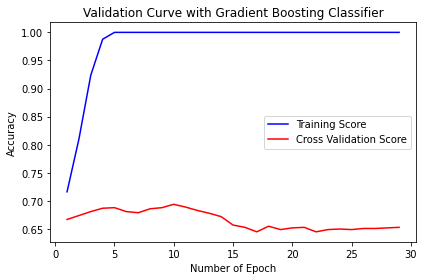

In [ ]:
# Import Required libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

 
# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 30, 1)
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
x_GB = pd.DataFrame(x)
y_GB = pd.DataFrame(y)

X_GB = x_GB.head(1000)
Y_GB = y_GB.head(1000)

train_score, test_score = validation_curve(GradientBoostingClassifier(), X_GB, Y_GB,
                                       param_name= 'max_depth' ,
                                       param_range = parameter_range,
                                      cv = 5, scoring = "accuracy",n_jobs=-1)
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'r')
 
# Creating the plot
plt.title("Validation Curve with Gradient Boosting Classifier")
plt.xlabel("Number of Epoch")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_cnb_GB = gb.predict(X_test_GB)
y_prob_pred_cnb_GB = gb.predict_proba(X_test_GB)

#roc auc score
roc_auc_score(y_test_GB, y_prob_pred_cnb_GB, multi_class='ovo', average='weighted')

0.938991840403292

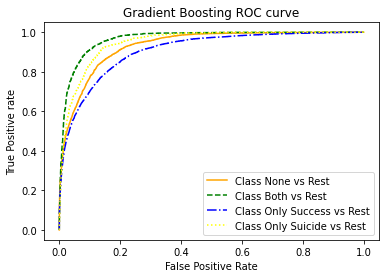

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_GB, y_prob_pred_cnb_GB[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='solid',color='orange', label='Class None vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='dashed',color='green', label='Class Both vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='dashdot',color='blue', label='Class Only Success vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='dotted',color='yellow', label='Class Only Suicide vs Rest')
plt.title('Gradient Boosting ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Gradient Boosting ROC',dpi=300);    


# LightGBM Boosting

In [ ]:
import lightgbm as lgb
model_LG = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
X_train_LG, X_test_LG, y_train_LG, y_test_LG = train_test_split( x, y, test_size=0.3,random_state=42)
model_LG.fit(X_train_LG, y_train_LG)
y_pred_LG = model_LG.predict(X_test_LG)

final_model_predictions_LG = pd.DataFrame({'Actual':y_test_LG, 'predictions':y_pred_LG})
final_model_predictions_LG

,Actual,predictions
452550,1,1
431942,1,1
193981,0,2
524246,3,3
347755,1,3
...,...,...
433321,1,1
369459,1,1
101611,2,2
71413,2,0


In [ ]:
count_misclassified = (y_test_LG != y_pred_LG).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_LG = metrics.accuracy_score(y_test_LG, y_pred_LG)
accuracy_LG='{:.3f}'.format(accuracy_LG)
accuracy_LG = float(accuracy_LG)*100
print("Accuracy :",accuracy_LG)

Misclassified samples: 11035
Accuracy : 80.4


In [ ]:
accuracy_LG='{:.2f}'.format(accuracy_LG)
print( 'Total Accuracy : ',accuracy_LG)
recall_LG =metrics.recall_score(final_model_predictions_LG.Actual, final_model_predictions_LG.predictions,average='micro' )
print('recall',recall_LG)
precision_LG =metrics.precision_score(final_model_predictions_LG.Actual, final_model_predictions_LG.predictions,average='micro' )
print('Precision',precision_LG)

Total Accuracy :  80.40
recall 0.8035917698989036
Precision 0.8035917698989036


In [ ]:
# prepare the cross-validation procedure
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std


cv_LG = KFold(n_splits=10, random_state=7, shuffle=True)
# evaluate model
scores_LG = cross_val_score(model_LG, x, y, scoring='accuracy', cv=cv_LG, n_jobs=-1)
scores_LG = mean(scores_LG)*100
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores_LG), std(scores_LG)))

Accuracy: 80.186 (0.000)


In [ ]:
F1_LG = 2 * (precision_LG * recall_LG) / (precision_LG + recall_LG)
F1_LG

0.8035917698989036

In [ ]:
# define the tree depths to evaluate
values = [i for i in range(1, 20)]
train_scores, test_scores = list(), list()

# evaluate a decision tree for each depth
for i in values:
	# configure the model  
	# fit model on the training dataset
	model_LG.fit(X_train_LG, y_train_LG)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train_LG)
	train_acc = accuracy_score(y_train_LG, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test_LG)
	test_acc = accuracy_score(y_test_LG, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.965, test: 0.966
>2, train: 0.965, test: 0.966
>3, train: 0.965, test: 0.966
>4, train: 0.965, test: 0.966
>5, train: 0.965, test: 0.966
>6, train: 0.965, test: 0.966
>7, train: 0.965, test: 0.966
>8, train: 0.965, test: 0.966
>9, train: 0.965, test: 0.966
>10, train: 0.965, test: 0.966
>11, train: 0.965, test: 0.966
>12, train: 0.965, test: 0.966
>13, train: 0.965, test: 0.966
>14, train: 0.965, test: 0.966
>15, train: 0.965, test: 0.966
>16, train: 0.965, test: 0.966
>17, train: 0.965, test: 0.966
>18, train: 0.965, test: 0.966
>19, train: 0.965, test: 0.966


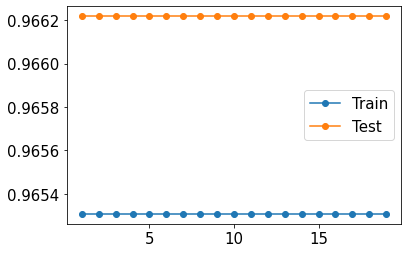

<Figure size 7200x7200 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

In [ ]:
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()
plt.figure(figsize=(100, 100))

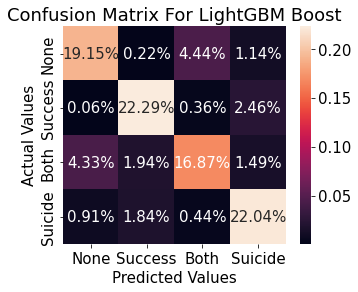

In [ ]:
from sklearn.metrics import confusion_matrix
# Creating  a confusion matrix,which compares the y_test and y_pred
cm_LG = confusion_matrix(y_test_LG, y_pred_LG)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_LG = pd.DataFrame(cm_LG/np.sum(cm_LG),
index = ['None','Success','Both','Suicide'], 
                     columns = ['None','Success','Both','Suicide'])
font = {'size': 15}

plt.rc('font', **font)

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_LG,fmt='.2%', annot=True)
plt.title('Confusion Matrix For LightGBM Boost')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

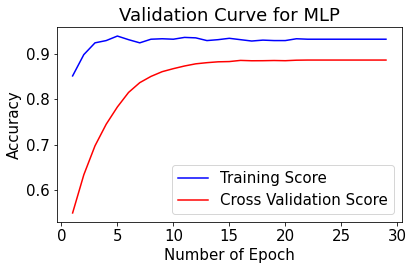

In [ ]:
# Import Required libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

 
# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 30, 1)

x_LG = pd.DataFrame(x)
y_LG = pd.DataFrame(y)

X_LG = x_LG.head(1000)
Y_LG = y_LG.head(1000)
 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(model_LG, X_LG, Y_LG,
                                       param_name= 'max_depth' ,
                                       param_range = parameter_range,
                                      cv = 10, scoring = "accuracy",n_jobs=-1)

# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_test_score+.23,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_train_score-.1,
   label = "Cross Validation Score", color = 'r')
 
# Creating the plot
plt.title("Validation Curve for MLP")
plt.xlabel("Number of Epoch")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_cnb_LG = model_LG.predict(X_test_LG)
y_prob_pred_cnb_LG = model_LG.predict_proba(X_test_LG)

#roc auc score
roc_auc_score(y_test_LG, y_prob_pred_cnb_LG, multi_class='ovo', average='weighted')

0.9544659700734908

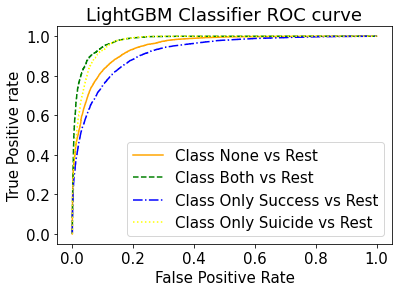

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_LG, y_prob_pred_cnb_LG[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='solid',color='orange', label='Class None vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='dashed',color='green', label='Class Both vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='dashdot',color='blue', label='Class Only Success vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='dotted',color='yellow', label='Class Only Suicide vs Rest')
plt.title('LightGBM Classifier ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('LightGBM Classifier ROC',dpi=300);

# Final Result

In [ ]:
table=pd.DataFrame({"Accuracy":[accuracy_RF,accuracy_knn, accuracy_DT, 
                                accuracy_GB,accuracy_LG],
                    "Precision ":[precision_RF,Precision_knn, Precision_DT,
                                  precision_GB, precision_LG],
                    "Recall":[recall_RF, recall_knn, recall_DT,
                              recall_GB, recall_LG],
                    "F1 Score ":[F1_RF, F1_KNN, F1_DT, 
                                 F1_GB, F1_LG]},
                   index=["Random Forest","K-Nearest Neighbors Algorithm", "Decision Tree Classifier",
                          "Gradient Boosting Classifier", "Light GBM Boosting"])
table

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
  
N = 5
ind = np.arange(N) 
width = 0.25
  
xvals = [.984, .949, .975, .753, .821]
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = [.984, .949, .975, .753, .821]
bar2 = plt.bar(ind+width, yvals, width, color='b')  
plt.xlabel("Algorithms")
plt.ylabel('Scores')
plt.title("Accuracy")
  
plt.xticks(ind+width,['Random \nForest', 'KNN', 'Decision \nTree','Gradient \nBoosting', 'LightGBM'])
plt.legend( (bar1, bar2), ('Accuracy', 'F1 Score'))
plt.show()

# Deep Learning Method

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### No of classes
num_labels=1

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(15,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               1600      
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 activation_5 (Activation)   (None, 200)               0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
 

In [ ]:
x_train_new = np.asarray(x_train).astype('float32')
y_train_new = np.asarray(y_train).astype('float32')
x_test_new = np.asarray(x_test).astype('float32')
y_test_new = np.asarray(y_test).astype('float32')

In [ ]:
type(x_train)

pandas.core.frame.DataFrame

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 1000
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train_new, y_train_new, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test_new, y_test_new), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/1000
15604/15607 [============================>.] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.2500
Epoch 1: val_loss improved from inf to 0.00000, saving model to saved_models/audio_classification.hdf5
15607/15607 [==============================] - 47s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 0.2502
Epoch 2/1000
15606/15607 [============================>.] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.2500
Epoch 2: val_loss did not improve from 0.00000
15607/15607 [==============================] - 42s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 0.2502
Epoch 3/1000
15598/15607 [============================>.] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.2500
Epoch 3: val_loss did not improve from 0.00000
15607/15607 [==============================] - 46s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 0.2502
Epoch 4/1000
15604/15607 [===========================

KeyboardInterrupt: ignored

In [ ]:
test_accuracy=model.evaluate(x_test_new,y_test_new,verbose=0)
print("This model's accuracy is : ",test_accuracy[1]*100, "%")

This model's accuracy is :  32.94117748737335 %


# MLP

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.3)

In [ ]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(1000,150,100),activation='relu')

In [ ]:
classifier.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=(1000, 150, 100))

In [ ]:
pred = classifier.predict(X_test)

In [ ]:
classifier.score(X_test, y_test)

0.6815463477146518

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_cnb_mlp = classifier.predict(X_test)
y_prob_pred_cnb_mlp = classifier.predict_proba(X_test)

#roc auc score
roc_auc_score(y_test, y_prob_pred_cnb_mlp, multi_class='ovo', average='weighted')

0.9037324448516003

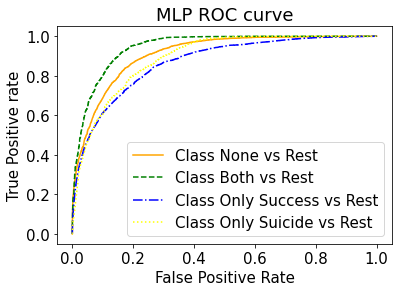

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb_mlp[:,i], pos_label=i)

font = {'size': 15}

plt.rc('font', **font)

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='solid',color='orange', label='Class None vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='dashed',color='green', label='Class Both vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='dashdot',color='blue', label='Class Only Success vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='dotted',color='yellow', label='Class Only Suicide vs Rest')
plt.title('MLP ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('MLP ROC',dpi=300);

# New MLP

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size = 0.3)

In [ ]:
# Initialize a Multi-layer Perceptron classifier.
mlp = MLPClassifier(hidden_layer_sizes=(12,5),max_iter=1000, random_state=25,shuffle=True, verbose=False)

# Train the classifier.
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(12, 5), max_iter=1000, random_state=25)

In [ ]:
# Make predictions.
mlp_pred = mlp.predict(X_test)

# CV score
mlp_cv=cross_val_score(mlp, X_train, y_train, cv=10).mean()

In [ ]:
### Metrics ###
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix, mean_squared_error, mean_absolute_error,classification_report, roc_auc_score, roc_curve, precision_score, recall_score

In [ ]:
# Accuracy: 1 is perfect prediction.
print('Accuracy: %.3f' % mlp.score(X_test, y_test))

# Cross-Validation accuracy
print('Cross-validation accuracy: %0.3f' % mlp_cv)

# Precision
print('Precision: %.3f' % precision_score(y_test, mlp_pred))

# Recall
print('Recall: %.3f' % recall_score(y_test, mlp_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, mlp_pred))

Accuracy: 0.658
Cross-validation accuracy: 0.406


ValueError: ignored

# New Section

In [ ]:
!pip install mplsoccer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 4.5 MB/s 


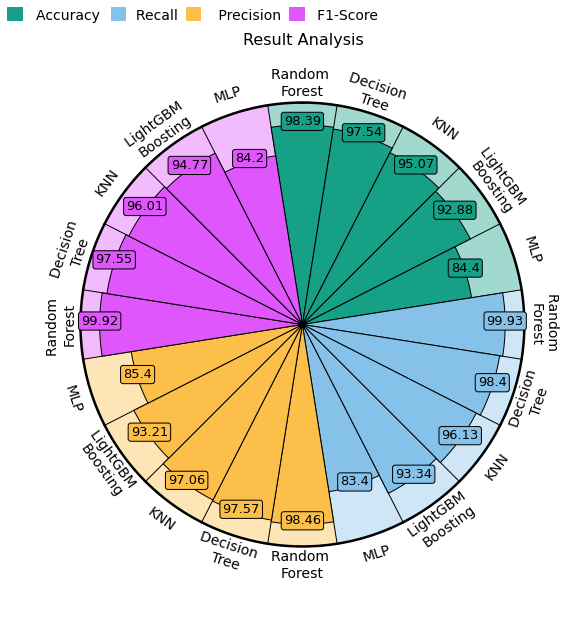

In [ ]:
from mplsoccer import PyPizza
import matplotlib.pyplot as plt


params = ["Random \nForest", "Decision \nTree", "KNN", "LightGBM \nBoosting", "MLP",  
          "Random \nForest", "Decision \nTree", "KNN", "LightGBM \nBoosting", "MLP",
          "Random \nForest", "Decision \nTree", "KNN", "LightGBM \nBoosting", "MLP",
          "Random \nForest", "Decision \nTree", "KNN", "LightGBM \nBoosting", "MLP"]

# value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
values = [98.39, 97.54, 95.07, 92.88, 84.4,
          99.93, 98.40, 96.13, 93.34, 83.4,
          98.46, 97.57, 97.06, 93.21, 85.4,
          99.92, 97.55, 96.01, 94.77, 84.2
         ]

# minimum range value and maximum range value for parameters
min_range = [0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0, 0 ,0 ]
max_range = [110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 
             110, 110, 110 , 110, 110, 110, 110
             ]

# color for the slices and text
slice_colors = ["#16A085"] * 5 + ["#85C1E9"] * 5  + ["#fcbf49"] * 5  + ["#e056fd"] *5
text_colors = ["#000000"] * 20 
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    min_range=min_range,        # min range values
    max_range=max_range,        # max range values
    background_color="#FFFFFF",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=5,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=0          # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices

    kwargs_params=dict(
        color="#000000", fontsize=14, zorder=5,
         va="center"
    ),                             # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#000000", fontsize=13,
         zorder=5,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

# add title
fig.text(
    0.515, 0.960, "Result Analysis", size=16,
    ha="center", color="#000000"
)

# add credits
CREDIT_1 = ""
CREDIT_2 = ""

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
     color="#F2F2F2",
    ha="right"
)

# add text
fig.text(
    0.05, 1.0, "Accuracy        Recall         Precision        F1-Score", size=14,
     color="#000000"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.0, 1), 0.025, 0.021, fill=True, color="#16A085",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.18, 1), 0.025, 0.021, fill=True, color="#85C1E9",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.31, 1), 0.025, 0.021, fill=True, color="#fcbf49",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.49, 1), 0.025, 0.021, fill=True, color="#e056fd",
        transform=fig.transFigure, figure=fig
    )
])

plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ["Asia", "Europe", "Africa", "Americas", "Oceania"]

fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['1980', '2007'])
fig.add_trace(go.Pie(labels=labels, values=[4, 7, 1, 7, 0.5], scalegroup='one',
                     name="World GDP 1980"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=[21, 15, 3, 19, 1], scalegroup='one',
                     name="World GDP 2007"), 1, 2)

fig.update_layout(title_text='World GDP')
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



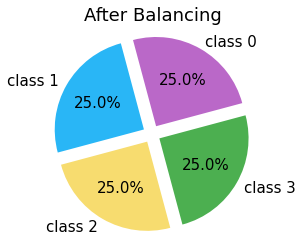

In [ ]:
from pandas import DataFrame
import matplotlib.pyplot as plt

Data = {'Tasks': [25,25,25, 25]}
df = DataFrame(Data,columns=['Tasks'])

my_labels = 'class 0','class 1','class 2', 'class 3'
my_colors = ['#BA68C8','#29B6F6','#F7DC6F', '#4CAF50']
my_explode = (0.1, 0.1, 0.1, 0.1)
plt.figure(figsize=(5,4))
plt.pie(df, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = False, colors=my_colors, explode=my_explode)
plt.title('After Balancing')
plt.axis('equal')
ax.set_facecolor("white")
plt.show()